<h1>Import Libraries</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
nltk.download('punkt')

import re

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
nltk.download('stopwords')
nltk.download('wordnet')

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\daisy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\daisy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\daisy\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


<h1>Importing Dataset</h1>

In [2]:
df = pd.read_csv('train.csv', encoding='ISO-8859-1')

<h1>Data Cleaning and Exploration</h1>

In [3]:
df.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            27481 non-null  object 
 1   text              27480 non-null  object 
 2   selected_text     27480 non-null  object 
 3   sentiment         27481 non-null  object 
 4   Time of Tweet     27481 non-null  object 
 5   Age of User       27481 non-null  object 
 6   Country           27481 non-null  object 
 7   Population -2020  27481 non-null  int64  
 8   Land Area (Km²)   27481 non-null  float64
 9   Density (P/Km²)   27481 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 2.1+ MB


In [5]:
df.duplicated().any()

False

In [6]:
df.shape

(27481, 10)

In [7]:
df.isna().sum()

textID              0
text                1
selected_text       1
sentiment           0
Time of Tweet       0
Age of User         0
Country             0
Population -2020    0
Land Area (Km²)     0
Density (P/Km²)     0
dtype: int64

In [8]:
df.dropna(inplace=True)
df.isna().sum()

textID              0
text                0
selected_text       0
sentiment           0
Time of Tweet       0
Age of User         0
Country             0
Population -2020    0
Land Area (Km²)     0
Density (P/Km²)     0
dtype: int64

In [9]:
df.shape

(27480, 10)

In [10]:
df.columns

Index(['textID', 'text', 'selected_text', 'sentiment', 'Time of Tweet',
       'Age of User', 'Country', 'Population -2020', 'Land Area (Km²)',
       'Density (P/Km²)'],
      dtype='object')

There are spaces in column names, we can replace them by underscores.

In [11]:
df.columns = df.columns.str.replace(' ', '_')

In [12]:
df.columns

Index(['textID', 'text', 'selected_text', 'sentiment', 'Time_of_Tweet',
       'Age_of_User', 'Country', 'Population_-2020', 'Land_Area_(Km²)',
       'Density_(P/Km²)'],
      dtype='object')

In [13]:
df.tail()

,textID,text,selected_text,sentiment,Time_of_Tweet,Age_of_User,Country,Population_-2020,Land_Area_(Km²),Density_(P/Km²)
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative,night,31-45,Ghana,31072940,227540.0,137
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative,morning,46-60,Greece,10423054,128900.0,81
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive,noon,60-70,Grenada,112523,340.0,331
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive,night,70-100,Guatemala,17915568,107160.0,167
27480,6f7127d9d7,All this flirting going on - The ATG smiles...,All this flirting going on - The ATG smiles. Y...,neutral,morning,0-20,Guinea,13132795,246000.0,53


<h1>Exploratory Data Analysis</h1>

<font size="4" color="blue" face="verdana"><b>1. Count of Sentiment Labels </b></font>

sentiment
neutral     11117
positive     8582
negative     7781
Name: count, dtype: int64


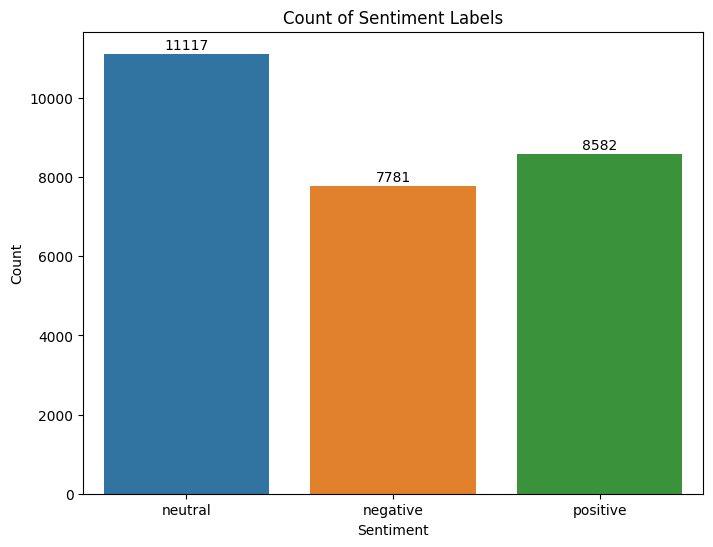

In [14]:
value_counts = df['sentiment'].value_counts()
print(value_counts)

# visualizing Count of Sentiment Labels using countplot
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='sentiment')
plt.title('Count of Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 6), 
                textcoords = 'offset points')    
plt.show()

This code computes the count of each sentiment label in the DataFrame df and then visualizes it using a countplot.

The loop iterates over each bar patch in the Axes object, annotating the height of each bar at its center with a specified format, horizontal and vertical alignment, and a vertical offset of 6 points.

In [15]:
df['Age_of_User'].unique()

array(['0-20', '21-30', '31-45', '46-60', '60-70', '70-100'], dtype=object)

<font size="4" color="blue" face="verdana"><b>2. Distribution of User Ages Across Sentiment Categories </b></font>

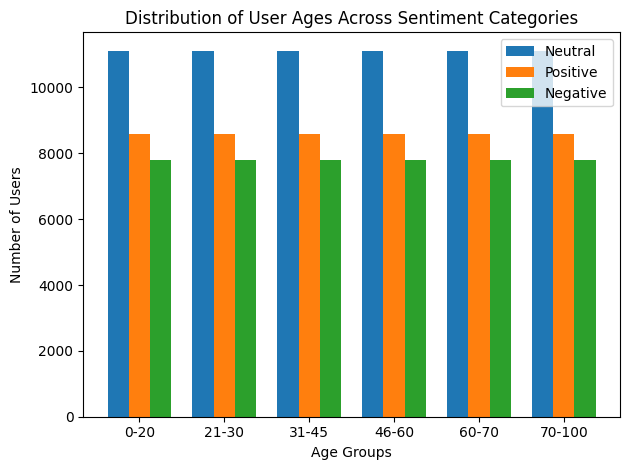

In [16]:
age_groups = df['Age_of_User'].unique()
neutral_count = value_counts['neutral']
positive_count = value_counts['positive']
negative_count = value_counts['negative']

bar_width = 0.25
index = range(len(age_groups))

plt.bar(index, [neutral_count] * len(age_groups), bar_width, label='Neutral')
plt.bar([i + bar_width for i in index], [positive_count] * len(age_groups), bar_width, label='Positive')
plt.bar([i + 2 * bar_width for i in index], [negative_count] * len(age_groups), bar_width, label='Negative')

plt.xlabel('Age Groups')
plt.ylabel('Number of Users')
plt.title('Distribution of User Ages Across Sentiment Categories')
plt.xticks([i + bar_width for i in index], age_groups)
plt.legend()
plt.tight_layout()
plt.show()

This code visualizes the distribution of user ages across different sentiment categories using a grouped bar plot.

The code extracts unique age groups and assigns counts for each sentiment category. 

<font size="4" color="blue" face="verdana"><b>3. Distribution of Text Lengths </b></font>

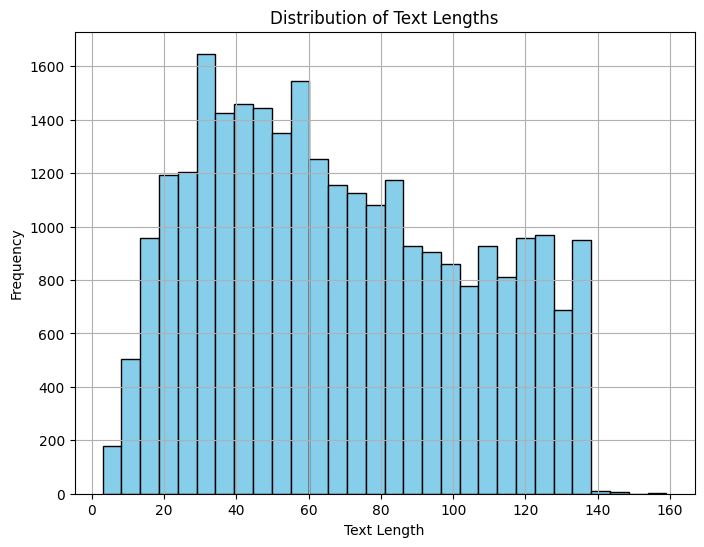

In [17]:
text_lengths = [len(text) for text in df['text']]

plt.figure(figsize=(8, 6))
plt.hist(text_lengths, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Distribution of Text Lengths')
plt.grid(True)
plt.show()

<font size="4" color="blue" face="verdana"><b>4. Distribution of Text Lengths </b></font>

In [18]:
from nltk.probability import FreqDist

selected_text = " ".join(df['selected_text'].astype(str))
tokens = word_tokenize(selected_text)
tokens = [word for word in tokens if word.isalnum()]
tokens = [word.lower() for word in tokens]
freq_dist = FreqDist(tokens)

print("Most common words in selected text:")
print(freq_dist.most_common(10))

Most common words in selected text:
[('i', 8997), ('to', 5303), ('the', 4594), ('a', 3541), ('you', 2870), ('it', 2836), ('my', 2793), ('and', 2356), ('is', 2117), ('s', 2002)]


<h1>Feature Selection (training data)</h1>

In [19]:
train_data = df[['text','sentiment']]

In [20]:
train_data.head()

,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative


# Data Preprocessing

In [21]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [22]:
def find_num_words(data):
    wordList = []
    for text in data:
        tokens = word_tokenize(text)
        wordList.extend(tokens)
            
    wordset = set(wordList)
    print("Number of unique words:", len(wordset))
    print("Total number of words:", len(wordList))
    
find_num_words(train_data.text)

Number of unique words: 34697
Total number of words: 438409


In [23]:
def cleaning(text):
    text = re.sub(r'\[[^]]*\]', '', text)
    text = re.sub(r'http\S+', '', text)    
    text = re.sub("[^a-zA-Z]", " ", text)
    
    text = ''.join([char for char in text if char not in string.punctuation])
    
    tokens = word_tokenize(text.lower())
    
    
    tokens = [word for word in tokens if word not in stop_words]
    
    lemma = WordNetLemmatizer()
    final_tokens = [lemma.lemmatize(word) for word in tokens]
    
    cleaned_text = ' '.join(final_tokens)
    
    return cleaned_text

train_data['cleaned_text'] = train_data['text'].apply(cleaning)

In [24]:
train_data.head()

,text,sentiment,cleaned_text
0,"I`d have responded, if I were going",neutral,responded going
1,Sooo SAD I will miss you here in San Diego!!!,negative,sooo sad miss san diego
2,my boss is bullying me...,negative,bos bullying
3,what interview! leave me alone,negative,interview leave alone
4,"Sons of ****, why couldn`t they put them on t...",negative,son put release already bought


<h1>Feature Selection and Cleaning (testing data)</h1>

In [25]:
test_data = pd.read_csv('test.csv', encoding='ISO-8859-1')[['text', 'sentiment']]

In [26]:
test_data.head()

,text,sentiment
0,Last session of the day http://twitpic.com/67ezh,neutral
1,Shanghai is also really exciting (precisely -...,positive
2,"Recession hit Veronique Branquinho, she has to...",negative
3,happy bday!,positive
4,http://twitpic.com/4w75p - I like it!!,positive


In [27]:
test_data = test_data[~(test_data['text'].isna() & test_data['sentiment'].isna())]
test_data

,text,sentiment
0,Last session of the day http://twitpic.com/67ezh,neutral
1,Shanghai is also really exciting (precisely -...,positive
2,"Recession hit Veronique Branquinho, she has to...",negative
3,happy bday!,positive
4,http://twitpic.com/4w75p - I like it!!,positive
...,...,...
3529,"its at 3 am, im very tired but i can`t sleep ...",negative
3530,All alone in this old house again. Thanks for...,positive
3531,I know what you mean. My little dog is sinkin...,negative
3532,_sutra what is your next youtube video gonna b...,positive


In [28]:
test_data['cleaned_text'] = test_data['text'].apply(cleaning)
print(test_data['text'][4])
test_data['cleaned_text'][4]

 http://twitpic.com/4w75p - I like it!!


'like'

<h4>Encoding Labels</h4>

In [29]:
train_data['sentiment_encoded'] = train_data['sentiment'].map({'positive': 1, 'negative': -1, 'neutral': 0})
test_data['sentiment_encoded'] = test_data['sentiment'].map({'positive': 1, 'negative': -1, 'neutral': 0})

In [30]:
train_data.head()

,text,sentiment,cleaned_text,sentiment_encoded
0,"I`d have responded, if I were going",neutral,responded going,0
1,Sooo SAD I will miss you here in San Diego!!!,negative,sooo sad miss san diego,-1
2,my boss is bullying me...,negative,bos bullying,-1
3,what interview! leave me alone,negative,interview leave alone,-1
4,"Sons of ****, why couldn`t they put them on t...",negative,son put release already bought,-1


# Model

<h3>TFIDF Text Vectorization</h3>

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000) 
X_train = vectorizer.fit_transform(train_data['cleaned_text'])
X_test = vectorizer.transform(test_data['cleaned_text'])

In [32]:
Y_train = train_data['sentiment_encoded']
Y_test = test_data['sentiment_encoded']

<h3>Naive Bayes</h3>

In [33]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, Y_train)

predictions = nb_classifier.predict(X_test)

accuracy = accuracy_score(Y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.6638370118845501


<h2>Prediction on custom data</h2>

In [34]:
def predict_sentiment(input_text, vectorizer, classifier):
    input_vector = vectorizer.transform([input_text])
    predicted_sentiment = nb_classifier.predict(input_vector)
    print(predicted_sentiment)
    if predicted_sentiment[0] == -1:
        return 'Negative'
    elif predicted_sentiment[0] == 0:
        return 'Neutral'
    else:
        return 'Positive'
        
input_text = "The traffic congestion on the highway caused significant delays for commuters during rush hour."
predicted_sentiment = predict_sentiment(input_text, vectorizer, nb_classifier)
print("Predicted Sentiment:", predicted_sentiment)

[-1]
Predicted Sentiment: Negative


<h3>Support Vector Machine (SVM)</h3>

In [35]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

svm_classifier = SVC(kernel='linear', C=1.0)
svm_classifier.fit(X_train, Y_train)

prediction_svm = svm_classifier.predict(X_test)
     
report = classification_report(Y_test, prediction_svm)
print("SVM Classification Report:")
print(report)

SVM Classification Report:
              precision    recall  f1-score   support

          -1       0.74      0.60      0.66      1001
           0       0.64      0.77      0.70      1430
           1       0.79      0.73      0.76      1103

    accuracy                           0.71      3534
   macro avg       0.73      0.70      0.71      3534
weighted avg       0.72      0.71      0.71      3534



<h2>Prediction on custom data</h2>

In [36]:
def predict_sentiment(input_text, vectorizer, classifier):
    input_vector = vectorizer.transform([input_text])
    predicted_sentiment = svm_classifier.predict(input_vector)
    print(predicted_sentiment)
    if predicted_sentiment[0] == -1:
        return 'Negative'
    elif predicted_sentiment[0] == 0:
        return 'Neutral'
    else:
        return 'Positive'
        
input_text = "Unfortunately, the product I ordered online arrived damaged, and the customer service response was unhelpful."
predicted_sentiment = predict_sentiment(input_text, vectorizer, svm_classifier)
print("Predicted Sentiment:", predicted_sentiment)

[-1]
Predicted Sentiment: Negative


<h3>LSTM</h3>

In [37]:
# pip install tensorflow

In [38]:
import keras
import tensorflow

In [39]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, BatchNormalization, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from keras.regularizers import l2

In [40]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(train_data['cleaned_text'])

train_sequences = tokenizer.texts_to_sequences(train_data['cleaned_text'])
max_length = max([len(seq) for seq in train_sequences])
padded_train_sequences = pad_sequences(train_sequences, maxlen=max_length, padding='post')
labels_train = pd.get_dummies(train_data['sentiment']).values

test_sequences = tokenizer.texts_to_sequences(test_data['cleaned_text'])
padded_test_sequences = pad_sequences(test_sequences, maxlen=max_length, padding='post')
labels_test = pd.get_dummies(test_data['sentiment']).values
print(padded_train_sequences)

[[9097   11    0 ...    0    0    0]
 [ 299   51   34 ...    0    0    0]
 [1178 9098    0 ...    0    0    0]
 ...
 [ 137    2  240 ...    0    0    0]
 [ 559    0    0 ...    0    0    0]
 [5622   11  556 ...    0    0    0]]


In [41]:
x_train, x_val, y_train, y_val = train_test_split(padded_train_sequences, labels_train, test_size=0.1, random_state=42)

vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 128

model2 = Sequential()
model2.add(Embedding(vocab_size, embedding_dim))
model2.add(LSTM(32, return_sequences=True, kernel_regularizer=l2(0.001)))
model2.add(BatchNormalization())

model2.add(LSTM(32, kernel_regularizer=l2(0.001)))
model2.add(BatchNormalization())

model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.1))
model2.add(Dense(3, activation='softmax'))

model2.compile(loss='categorical_crossentropy', 
               optimizer=Adam(learning_rate=0.002), 
               metrics=['accuracy'])

model2.fit(x_train, y_train, epochs=8, batch_size = 64, validation_data=(x_val, y_val))

test_loss, test_accuracy = model2.evaluate(padded_test_sequences, labels_test)
print("Test Accuracy:", test_accuracy)
print("Test Loss", test_loss)

Epoch 1/8
387/387 ━━━━━━━━━━━━━━━━━━━━ 25s 51ms/step - accuracy: 0.5479 - loss: 1.0230 - val_accuracy: 0.5004 - val_loss: 0.9960
Epoch 2/8
387/387 ━━━━━━━━━━━━━━━━━━━━ 18s 47ms/step - accuracy: 0.7566 - loss: 0.6494 - val_accuracy: 0.4210 - val_loss: 1.2193
Epoch 3/8
387/387 ━━━━━━━━━━━━━━━━━━━━ 18s 47ms/step - accuracy: 0.8100 - loss: 0.5265 - val_accuracy: 0.6972 - val_loss: 0.7585
Epoch 4/8
387/387 ━━━━━━━━━━━━━━━━━━━━ 18s 48ms/step - accuracy: 0.8474 - loss: 0.4340 - val_accuracy: 0.6827 - val_loss: 0.9000
Epoch 5/8
387/387 ━━━━━━━━━━━━━━━━━━━━ 18s 47ms/step - accuracy: 0.8695 - loss: 0.3811 - val_accuracy: 0.6128 - val_loss: 1.7942
Epoch 6/8
387/387 ━━━━━━━━━━━━━━━━━━━━ 19s 49ms/step - accuracy: 0.8879 - loss: 0.3298 - val_accuracy: 0.6448 - val_loss: 1.2873
Epoch 7/8
387/387 ━━━━━━━━━━━━━━━━━━━━ 19s 49ms/step - accuracy: 0.8959 - loss: 0.3087 - val_accuracy: 0.6303 - val_loss: 1.4679
Epoch 8/8
387/387 ━━━━━━━━━━━━━━━━━━━━ 19s 49ms/step - accuracy: 0.9036 - loss: 0.2818 - val_accu

<h2>Prediction on custom data</h2>

In [42]:
def predict_sentiment(input_text, tokenizer, model, max_length):
    input_sequence = tokenizer.texts_to_sequences([input_text])
    padded_input_sequence = pad_sequences(input_sequence, maxlen=max_length, padding='post')
    prediction = model.predict(padded_input_sequence)
    print(prediction)
    predicted_class = np.argmax(prediction, axis=1)[0]
    print(predicted_class)
    
    if predicted_class == 0:
        return 'Negative'
    elif predicted_class == 1:
        return 'Neutral'
    else:
        return 'Positive'

input_text = "The new restaurant in town serves delicious food with excellent service."
predicted_sentiment = predict_sentiment(input_text, tokenizer, model2, max_length)
print("Predicted Sentiment:", predicted_sentiment)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step
[[2.3454976e-04 7.6755410e-04 9.9899787e-01]]
2
Predicted Sentiment: Positive


<h1>GRU</h1>

In [43]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [44]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(train_data['cleaned_text'])
train_sequences = tokenizer.texts_to_sequences(train_data['cleaned_text'])
max_sequence_length = max(len(sequence) for sequence in train_sequences)

In [45]:
X_train = pad_sequences(train_sequences, maxlen=max_sequence_length)
y_train = pd.get_dummies(train_data['sentiment']).values

sequences_test = tokenizer.texts_to_sequences(test_data['cleaned_text'])
X_test = pad_sequences(sequences_test, maxlen=max_sequence_length)
y_test = pd.get_dummies(test_data['sentiment']).values

In [46]:
model_GRU = Sequential()
model_GRU.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=max_sequence_length))
model_GRU.add(GRU(units=64, return_sequences=True, kernel_regularizer=tf.keras.regularizers.l2(0.00015), dropout=0.5))
model_GRU.add(GRU(units=32, kernel_regularizer=tf.keras.regularizers.l2(0.00015)))
model_GRU.add(Dense(16, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.00015)))
model_GRU.add(Dense(8, activation="relu"))
model_GRU.add(Dense(3, activation='softmax'))

In [47]:
optimizer = Adam(learning_rate=0.001)  # Increased learning rate
model_GRU.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model_GRU.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
387/387 ━━━━━━━━━━━━━━━━━━━━ 26s 53ms/step - accuracy: 0.5160 - loss: 0.9755 - val_accuracy: 0.7114 - val_loss: 0.7168
Epoch 2/5
387/387 ━━━━━━━━━━━━━━━━━━━━ 21s 55ms/step - accuracy: 0.7510 - loss: 0.6368 - val_accuracy: 0.7213 - val_loss: 0.6970
Epoch 3/5
387/387 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - accuracy: 0.7891 - loss: 0.5544 - val_accuracy: 0.7078 - val_loss: 0.7494
Epoch 4/5
387/387 ━━━━━━━━━━━━━━━━━━━━ 21s 53ms/step - accuracy: 0.8131 - loss: 0.5011 - val_accuracy: 0.7031 - val_loss: 0.7493
Epoch 5/5
 22/387 ━━━━━━━━━━━━━━━━━━━━ 19s 53ms/step - accuracy: 0.8558 - loss: 0.4108

<h3>Graph of Accuracy and Validation Accuracy</h3>

In [ ]:
test_loss, test_accuracy = model_GRU.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

<h1>Model Interpretation (LIME)</h1>

In [ ]:
from lime.lime_text import LimeTextExplainer

class_names = ['negative', 'neutral', 'positive']

def predict_prob(texts):
    sequences = tokenizer.texts_to_sequences(texts)
    padded = pad_sequences(sequences, maxlen=max_sequence_length)
    return model_GRU.predict(padded)

explainer = LimeTextExplainer(class_names=class_names)

idx = 7
sample_text = test_data['text'].iloc[idx]
exp = explainer.explain_instance(sample_text, predict_prob, num_features=10)

print(f"Document id: {idx}")
print(f"Text: {sample_text}")
print(f"True label: {test_data['sentiment'].iloc[idx]}")
exp.show_in_notebook(text=True)

<h1>Evaluation Metrics</h1>

In [ ]:
from sklearn.metrics import classification_report

test_predictions = model_GRU.predict(X_test)

predicted_labels = [np.argmax(pred) for pred in test_predictions]
true_labels = [np.argmax(label) for label in y_test]

report = classification_report(true_labels, predicted_labels)
print("Classification Report:")
print(report)

<h2>Prediction on custom data</h2>

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

def predict_sentiment(text, model, tokenizer, max_sequence_length):
    sequence = tokenizer.texts_to_sequences([text])
    padded_sequence = pad_sequences(sequence, maxlen=max_sequence_length)

    pred_prob = model.predict(padded_sequence)

    sentiment_label = np.argmax(pred_prob, axis=1)[0]
    if sentiment_label == 0:
        return 'Negative'
    elif sentiment_label == 1:
        return 'Neutral'
    else:
        return 'Positive'

    return sentiment_label

input_text1 = "My best friend surprised me with tickets to my favorite band's concert, and I couldn't be happier."
predicted_sentiment1 = predict_sentiment(input_text, model_GRU, tokenizer, max_sequence_length)
print("Predicted Sentiment:", predicted_sentiment)

input_text2 = "The weather today is neither too hot nor too cold."
predicted_sentiment2 = predict_sentiment(input_text2, model_GRU, tokenizer, max_sequence_length)
print("Predicted Sentiment:", predicted_sentiment2)